# Reddit PushShift Exloratory Data Analysis
### Reddit Questions and Searches 

* Entire comments and subcomments that contain the word “cancer” 
    * (Parallel to A1, B3a, B13 in HINTS?)
    * Calculate frequency per year
* Reddits and subreddits that contain the word “cancer”

In addition, we combed the entire Reddit PushShift dataset provided based on the following criteria: 

| **Variable**                  | **Description**                                                                                                                                                                                                                                     |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| FrustratingCancerSearch       | “Frustrating” or “frustrat” and “cancer” (HINTS A2b)                                                                                                                                                                                               |
| CancerDoctorsTrust            | “Cancer” and “doctors” or “trust” (does not need to contain "trust" since trust is included in NRC sentiment analysis) (HINTS A3a)                                                                                                                |
| CancerFamilyTrust             | “Cancer” and “family” or “friends” or various familial terms (e.g., “sister,” “brother,” “mother”) or “trust” (HINTS A3b)                                                                                                                         |
| CancerGovHealthcarePrograms   | “Cancer” and government_healthcare_programs, such as ["Medicare," "Medicaid," "ACA," "NIH," etc.] or “trust” (HINTS A3c)                                                                                                                           |
| CancerCharitiesTrust          | “Cancer” and cancer_charities, such as ["American Cancer Society," "LLS," "BCRF," "Livestrong," etc.] or “trust” (HINTS A3d)                                                                                                                      |
| CancerReligiousOrgTrust       | “Cancer” and charitable_religious_organizations, such as ["Catholic Relief Services," "World Vision," "Salvation Army," etc.] or “trust” (HINTS A3e)                                                                                               |
| CancerScientistsTrust         | “Cancer” and top_cancer_institutes, such as ["MD Anderson," "Mayo Clinic," "UCSF," "Roswell Park," etc.] or “trust” (HINTS A3f)                                                                                                                   |
| InsuranceCancer               | “Insurance” and “cancer”                                                                                                                                                                                                                           |
| MedicareCancer                | “Medicare” and “cancer”                                                                                                                                                                                                                            |
| MedicaidCancer                | “Medicaid” and “cancer”   


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install nrclex
from nrclex import NRCLex
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import datetime
import re
import nltk
#!pip install textblob
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('punkt')  # For tokenization
nltk.download('averaged_perceptron_tagger')# Required for NRCLex

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 6, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43311 sha256=77f1ecd143166c4edc4bf05c1900394fad69d74ed67ab8a23a8487515581bd22
  Stored in directory: /home/trusted-service-user/.cache/pip/wheels/7e/b4/2a/69658a21d1cc6414aff94c1aa6b31f7e79b735422987995f75
Successfully built nrclex


[nltk_data] Downloading package vader_lexicon to /home/trusted-
[nltk_data]     service-user/nltk_data...
[nltk_data] Downloading package punkt to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/trusted-service-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Basic Exploration

In [2]:
# Using Big Cloud Data qeuried for the EDA Analysis to run with 

# testing to make sure i can read the parquet file from the blob again
workspace_default_storage_account = "projectgstoragedfb938a3e"
workspace_default_container = "azureml-blobstore-becc8696-e562-432e-af12-8a5e3e1f9b0f"
workspace_wasbs_base_url = f"wasbs://{workspace_default_container}@{workspace_default_storage_account}.blob.core.windows.net/"

# the parquet path again
output_path = f"wasbs://{workspace_default_container}@{workspace_default_storage_account}.blob.core.windows.net/cancer_subreddit.parquet"

# Read the Parquet file back into a dataframe
df1 = spark.read.parquet(output_path)

# Show first 5 rows
df1.show(5)
df1.printSchema()
comments_row_count = df1.count()
comment_col_count = len(df1.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 7, Finished, Available, Finished)

+------------------+----------------------+--------------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+-------------+------------+----+---+--------------------+
|            author|author_flair_css_class|   author_flair_text|                body|controversiality|created_utc|distinguished|edited|gilded|     id|   link_id| parent_id|retrieved_on|score|stickied|    subreddit|subreddit_id|yyyy| mm|        cleaned_body|
+------------------+----------------------+--------------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+-------------+------------+----+---+--------------------+
| redhtbassplyr0311|                  null|         RN - ICU 🍕|Check out Northsi...|               0| 1714691222|         null|  null|     0|l2bha78|t3_1cir563|t3_1cir563|  1714691237|    2|   false|      nursing|    t5_2ra72|

In [3]:
output_path = f"{workspace_wasbs_base_url}not_cancer_subreddit.parquet"
# Read the Parquet file back into a dataframe
df2 = spark.read.parquet(output_path)

# Show first 5 rows
df2.show(5)
df2.printSchema()
comments_row_count = df2.count()
comment_col_count = len(df2.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 8, Finished, Available, Finished)

+----------------+----------------------+-----------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+-------------------+------------+----+---+--------------------+
|          author|author_flair_css_class|author_flair_text|                body|controversiality|created_utc|distinguished|edited|gilded|     id|   link_id| parent_id|retrieved_on|score|stickied|          subreddit|subreddit_id|yyyy| mm|        cleaned_body|
+----------------+----------------------+-----------------+--------------------+----------------+-----------+-------------+------+------+-------+----------+----------+------------+-----+--------+-------------------+------------+----+---+--------------------+
|     LittleGrowl|                  null|             null|It’s like saying ...|               0| 1701783300|         null|  null|     0|kc3bfti|t3_18baicd|t1_kc34yud|  1701783318|   22|   false|relationship_advice|    t5_2

In [5]:
# Combine Big data cloud data to perform EDA 
df = df1.union(df2)
# Show top 5
# Select neccesary columns for EDA created 
df = df.select('body' ,'controversiality', 'created_utc', 'subreddit')
df.show(5)
df.printSchema()
comments_row_count = df.count()
comment_col_count = len(df.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 10, Finished, Available, Finished)

+--------------------+----------------+-----------+-------------+
|                body|controversiality|created_utc|    subreddit|
+--------------------+----------------+-----------+-------------+
|Check out Northsi...|               0| 1714691222|      nursing|
|I had something s...|               0| 1714691276| WomensHealth|
|That's an insulti...|               0| 1714691284|      nursing|
|Yeah sorry, it wa...|               0| 1714691482|      AskDocs|
|I see my colorect...|               0| 1714691514|CrohnsDisease|
+--------------------+----------------+-----------+-------------+
only showing top 5 rows

root
 |-- body: string (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- subreddit: string (nullable = true)

shape of the comments dataframe is 20,000x4


In [6]:
#Convert parquet into pandas 
# the parquet path again
workspace_default_storage_account = "projectgstoragedfb938a3e"
workspace_default_container = "azureml-blobstore-becc8696-e562-432e-af12-8a5e3e1f9b0f"
output_path = f"wasbs://{workspace_default_container}@{workspace_default_storage_account}.blob.core.windows.net/merged_cancer_subreddit.parquet"
merged_df_spark = spark.read.parquet(output_path)

df = merged_df_spark.toPandas()

print(df.head(5))
print(f"shape of the Pandas DataFrame is {df.shape}")

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 11, Finished, Available, Finished)

                                                body  controversiality  \
0  Check out Northside Hospital -Atlanta, Piedmon...                 0   
1  I had something similar and managed to get it ...                 0   
2  That's an insulting offer, and I'm a LPN. Out ...                 0   
3  Yeah sorry, it was my mistake. I meant to say ...                 0   
4  I see my colorectal dr tomorrow. My disease is...                 0   

   created_utc      subreddit  
0   1714691222        nursing  
1   1714691276   WomensHealth  
2   1714691284        nursing  
3   1714691482        AskDocs  
4   1714691514  CrohnsDisease  
shape of the Pandas DataFrame is (20000, 4)


In [7]:
# checking for missing values
df.isna().sum()

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 12, Finished, Available, Finished)

body                0
controversiality    0
created_utc         0
subreddit           0
dtype: int64

In [8]:
print(df['subreddit'].unique())

print(df.dtypes)

# converting the time to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')  # Convert timestamp if necessary

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 13, Finished, Available, Finished)

['nursing' 'WomensHealth' 'AskDocs' ... 'PKA' 'Fumofumo' 'LiminalSpace']
body                object
controversiality     int64
created_utc          int64
subreddit           object
dtype: object


In [9]:

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['body'] = df['body'].apply(preprocess_text)

df.head(2)

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 14, Finished, Available, Finished)

,body,controversiality,created_utc,subreddit
0,check out northside hospital atlanta piedmont ...,0,2024-05-02 23:07:02,nursing
1,i had something similar and managed to get it ...,0,2024-05-02 23:07:56,WomensHealth


# Questions to Explore:


The primary goal of this exploratory data analysis was to gain a comprehensive understanding of the dataset that would lay the groundwork for us to go into further advanced modeling to answer our questions to address. The dataset includes columns such as 'body', 'controversiality', 'created_utc', and 'subreddit'.


The analysis in this section is focused on several key aspects to uncover insights within healthcare-related subreddits. Given the diversity of subreddits, we aimed to examine how emotions vary across different communities, as each subreddit likely captures unique sentiments and experiences related to health. One main target which we wanted to focus on was analyzing certain keywords and the level of frequency between the subreddits to provide insight on certain topics and identifying patterns which we can use for our NLP and ML model analysis.


The 'body' column, containing user comments, was analyzed for sentiment to classify emotions such as sadness, fear, frustration, and joy across different subreddit groups. The 'created_utc' column was leveraged to study temporal trends, analyzing how sentiment and emotion change over time or vary by day of the week. By examining these aspects, we were able to answer targeted questions about user experiences, sentiment distributions, engagement patterns, and common themes discussed within each community, ultimately providing a holistic view of the dataset’s emotional landscape. Overall, using all the existing data will help inform the development of models for advanced analysis, including novel classification techniques.



## Are certain subreddits more likely to express interpersonal conflict or emotional support?


**Purpose**:
This analysis explores which subreddits are more likely to feature discussions about interpersonal conflict or emotional support, highlighting the role of community dynamics in health-related experiences. By examining the frequency of keywords associated with conflict—such as negative emotions of frustration, struggles, and relational challenges—and support keywords that signify kindness, empathy, and encouragement, we aim to understand whether these communities approach health challenges in a unified and positive manner or show signs of division within.

**Outcome**: The analysis reveals conflict and support mentions across healthcare subreddits reveals varying dynamics in community interactions. Subreddits such as nursing, AskDocs, and breastcancer exhibit high levels of both conflict and support, indicating that members frequently discuss mutual encouragement but also deal with frustrations. In contrast, when compared to other subreddits such as HealthInsurance, CrohnsDisease and cancer have relatively high support but low conflict, which suggests people are getting encouragement and unity in these subreddits.

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 22, Finished, Available, Finished)

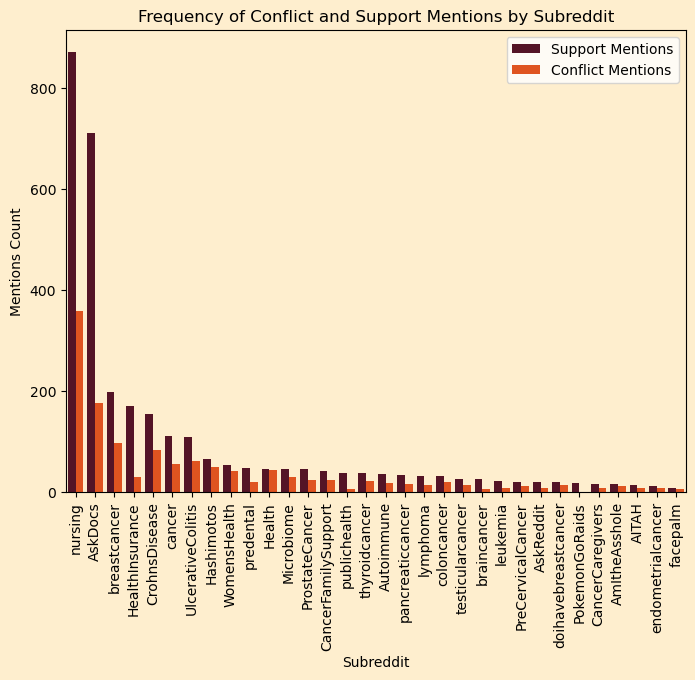

In [17]:
conflict_keywords = [
    "frustration", "disappointment", "anger", "resentment", "annoyance", "conflict", 
    "tension", "irritation", "betrayal", "arguments", "struggle", "stress", 
    "misunderstanding", "criticism", "blame", "guilt", "hostility", "resent", 
    "unhappy", "sadness", "upset", "hurt", "fighting", "argument", "tough", 
    "challenging", "difficulty", "pressure", "discouragement", "despair", 
    "fear", "helplessness", "hopelessness", "loss", "disapproval", "rejection", 
    "grief", "pain", "suffering", "alienation", "abandonment", "desperation", 
    "friction", "dispute", "distrust", "confusion", "embarrassment", "injustice", 
    "unfair", "isolation", "loneliness", "agitation", "disgust", "irritability", 
    "exclusion", "condemnation", "bitterness", "exasperation", "discontent", 
    "jealousy", "envy", "regret", "doubt", "turmoil", "burden", "anxiety", 
    "pressure", "insecurity", "worry", "distress", "disillusionment", "strife", 
    "unresolved", "torment", "persecution", "victimization", "abrasiveness", 
    "defiance", "rebellion", "protest", "contempt", "accusation", "attack", 
    "judgment", "exclusion", "neglect", "withdrawal", "abuse", "mockery", "clash"
] # added more words to balance the viz

support_keywords = [
    "support", "help", "care", "encourage", "comfort", "kindness", "understanding", 
    "compassion", "empathy", "assistance", "guidance", "backing", "aid", "uplifting", 
    "positive", "friendship", "community", "reassurance", "sympathy", "solidarity", 
    "together", "listening", "patience", "trust", "love", "appreciation", "encouragement", 
    "advice", "warmth", "respect", "hope", "motivating", "strength", "connection"
]

df['conflict_mention'] = df['body'].apply(lambda x: any(keyword in x for keyword in conflict_keywords))
df['support_mention'] = df['body'].apply(lambda x: any(keyword in x for keyword in support_keywords))

# Aggregate counts
conflict_counts = df.groupby('subreddit')['conflict_mention'].sum().sort_values(ascending = False)
support_counts = df.groupby('subreddit')['support_mention'].sum().sort_values(ascending = False)

# Select top 50 reddit
top_conflict_subreddit = conflict_counts.head(30).index
top_support_subreddit = support_counts.head(30).index

# combine two sets 
top_subreddit = set(top_conflict_subreddit).union(set(top_support_subreddit))

# Filter Df for these subreddit 
filtered_df = df[df['subreddit'].isin(top_subreddit)]
filtered_conflict_counts = filtered_df.groupby('subreddit')['conflict_mention'].sum()
filtered_support_counts = filtered_df.groupby('subreddit')['support_mention'].sum()

conflict_values = filtered_conflict_counts.values
support_values = filtered_support_counts.values
subreddit_labels = filtered_conflict_counts.index

# Add theme 
hex_colors = {
    'Conflict Mentions' : "#ff4500", 
    'Support Mentions': "#5f0922"
}

# Prepare data for dodge plot
dodge_data = pd.DataFrame({
    'subreddit': filtered_conflict_counts.index.tolist() + filtered_support_counts.index.tolist(),
    'mention_type': ['Conflict Mentions'] * len(filtered_conflict_counts) + ['Support Mentions']  * len(filtered_support_counts),
    'count': filtered_conflict_counts.tolist() + filtered_support_counts.tolist()
})
dodge_data = dodge_data.sort_values(by = 'count', ascending= False)


# Plot using Seaborn
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data = dodge_data, x='subreddit', y= 'count', hue = 'mention_type', palette=  hex_colors)
ax.set_facecolor('#feeece')
fig.set_facecolor('#feeece')
plt.title('Frequency of Conflict and Support Mentions by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Mentions Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()


## What is the average sentiment score?


**Purpose**: The purpose of calculating the average sentiment score is to understand the general emotional tone across different subreddits. By examining the average sentiment for each subreddit, we can gain insights into whether discussions within these communities tend to be positive, negative, or neutral overall. This analysis helps identify which healthcare communities are more optimistic or challenged in their outlook, offering a broader view of the emotional landscape within each subreddit.


**Outcome**: The sentiment analysis for healthcare subreddits from the months of June 2023- July 2024, reveals a range of emotional tones across communities. Subreddits like publichealth(0.9- June 2023), and lymphoma(0.71, January 2024) and Prostatecancer(0.55- December 2023) have positive sentiment scores, suggesting a  upportive or encouraging atmosphere among members. On the other hand, communities like Autoimmune(-0.4), thyroidcancer(-0.41) and coloncancer(-0.3) show more negative sentiment, potentially indicating challenges, frustrations, or concerns commonly shared by these users. Several subreddits, such as nursing, breastcancer and HealthInsurance exhibit scores closer to neutral, implying a balanced mix of positive and negative experiences. This on an overall scale of sentiment scores highlights the diversity of emotional climates within these healthcare communities, reflecting the unique support needs and challenges faced by each group.

In [20]:
# Create sentiment score and label to calculate average sentiment
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['body'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 25, Finished, Available, Finished)

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 60, Finished, Available, Finished)

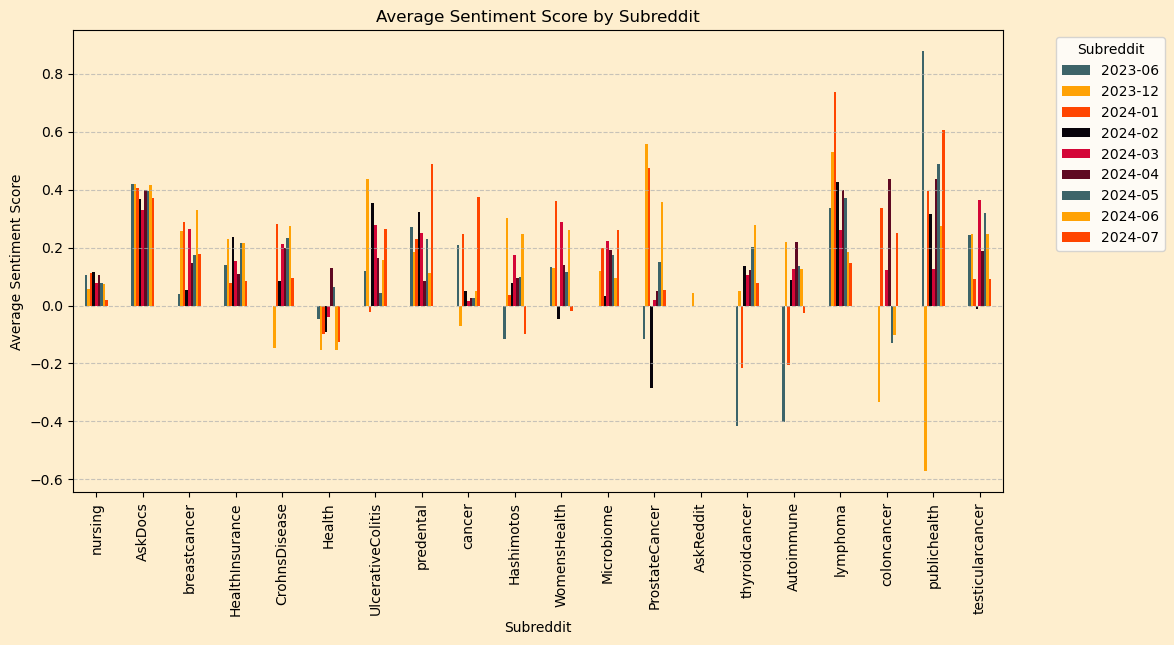

In [55]:
# Convert data to a date time just in case 
df['date'] = df['created_utc'].dt.date
df['date'] = pd.to_datetime(df['date'])

# Add new column for month 
df['month'] = df['date'].dt.to_period('M')

# Aggregate sentiment by month and subreddit
monthly_sentiment = df.groupby(['month', 'subreddit'])['sentiment_score'].mean().unstack()

# Filter top 20 subreddit 
top_subreddits = df['subreddit'].value_counts().head(20).index
monthly_sentiment = monthly_sentiment[top_subreddits] 

# Add theme 
hex_colors = [
    "#3d6469", "#ffa205", "#ff4500", "#08030a", "#d40637", "#5f0922"
]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
monthly_sentiment.T.plot(kind='bar', ax = ax, color=hex_colors[:len(top_subreddits)])
ax.set_facecolor('#feeece')
fig.set_facecolor('#feeece')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.title('Average Sentiment Score by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## What are the most common words or phrases for positive versus negative comments?

**Purpose**: Identifying the most common words in positive versus negative comments provides insight into the experiences and attitudes within the community. This analysis helps uncover topics, concerns, and emotions associated with each sentiment, offering a more nuanced understanding of the community's overall mood and focus.

**Outcome**: The most common words within positive and negative comments, we observe and remove many stopwords that could be considered insignificant for our text analysis to see what words lead to more positive and negative comments. Words like "doctor", "first" and "feel" appear across both sentiment categories, highlighting the centrality of health experiences in these discussions. In positive comments, expressions such as "Concern," "questions," and "action" indicate explanatory language, often associated with sharing advice or encouragement. Conversely, negative comments include words like "Patient", "cancer" and "work" hinting at expressions of dissatisfaction, frustration, or challenges.


StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 62, Finished, Available, Finished)

/tmp/ipykernel_8013/768979471.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


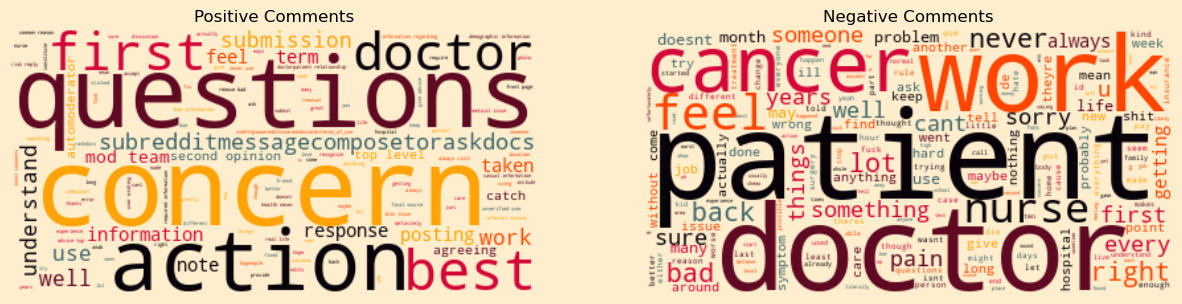

In [57]:
from wordcloud import STOPWORDS
import random
# Add stopwords
extra_stopwords = ['reddit', 'post', 'will', 'one', "comment", "thread", "subreddit", 
    "question", "bot", "removed", "edit", 'day', 'now', 'youre', 'year', 'much', 'say',
    "contact", "message", "please", "thank", "moderator", "compose", "post", 'didnt',
    "https", "com", "automatically", "performed", "just", "like", "really", 'time', 'ive',
    "know", "think", "don", "does", "want", "make", "take", "said", "got", 'go',
    "going", "see", "look", "people", "thing", "way", "good", "help", "you", 'thats',
    "i'm", "they", "we", "he", "she", "it", "my", "our", "their", "that", 'need',
    "this", "these", "those", "and", "but", "or", "if", "im", "dont", "moderators", "even", "still"]
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(extra_stopwords)

# positive vs negative
positive_comments = ' '.join(df[df['sentiment_score'] > 0]['body'])
negative_comments = ' '.join(df[df['sentiment_score'] < 0]['body'])

# Add theme 
hex_colors = [
    "#3d6469", "#ffa205", "#ff4500", "#08030a", "#d40637", "#5f0922"
]

# Define custom color function 
def custom_color(word, font_size, position, orientation, random_state = None, **kwargs):
    return random.choice(hex_colors)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 7))
fig.set_facecolor('#feeece')

# positive
plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color='#feeece', stopwords= custom_stopwords, color_func= custom_color).generate(positive_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments')

# negative
plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color='#feeece', stopwords= custom_stopwords, color_func= custom_color).generate(negative_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments')
plt.show()


## What are the most common expressions of gratitude, frustration, hope, fear, sadness or joy?


**Purpose:**  Identifying the most common expressions of gratitude, frustration, joy, fear, sadness and hope offers valuable insight into the language used for support, shared challenges, and encouragement within healthcare communities. This analysis helps uncover how individuals convey their emotions, revealing the words and phrases that resonate most when expressing appreciation, challenges, or optimism.


**Note**: The words are editable


**Outcome**: In our analysis, we determined that gratitude is the most frequent emotion among the three categories, with over 1750+ mentions. Hope is a close second with around 1300 mentions. This suggests that individuals within these healthcare communities often express optimism or a desire for positive outcomes. Expressions of joy, with over 250 mentions, indicate  happiness for support and shared experiences. Fear, sadness and frustration are mentioned less frequently than the other emotions with around 250 mentions at maximum, signaling that while there are challenges, they may be less dominant in the discourse compared to hopeful or thankful sentiments. This analysis uses keywords like "thank you", "afraid", and "sad", to help highlight the tone within these communities.


StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 69, 72, Finished, Available, Finished)

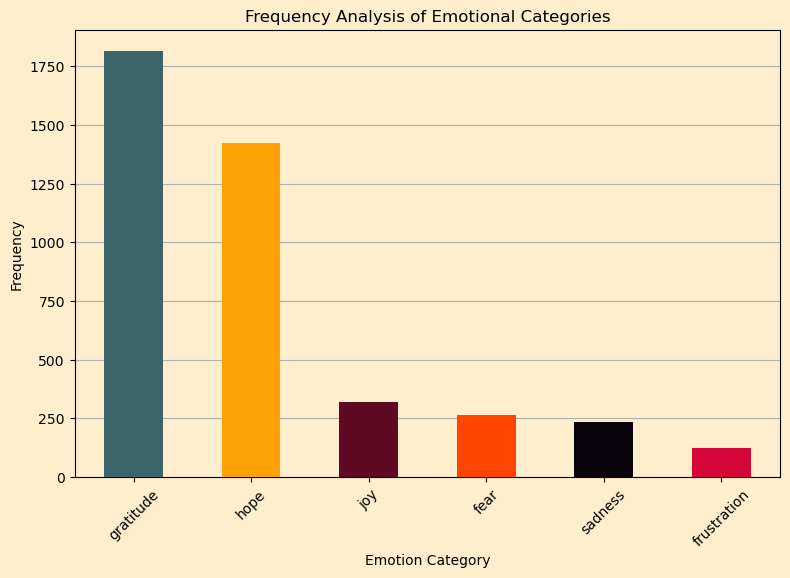

In [67]:
# keywords for each emotion category

# can edit these words to anything else
gratitude_keywords = ["thank you", "thanks", "appreciate",  "grateful", "thankful", "much obliged", "thanks so much", "thank goodness", "blessed"]
hope_keywords = ["hope", "optimistic", "wish", "dream", "trust"]
frustration_keywords = ["frustrated", "annoyed", "disappointed", "irritated",  "bothered", "discouraged", "dissatisfied", "upset", "angry"]
fear_keywords = ["afraid", "scared", "fearful", "nervous", "worried", "anxious", "terrified", "panicked", "dread", "alarmed"]
sadness_keywords = ["sad", "depressed", "unhappy", "miserable", "heartbroken", "grief", "lonely", "tearful",]
joy_keywords = ["happy", "joyful", "delighted", "excited", "cheerful", "ecstatic", "content", "satisfied", "pleased", "smiling"]

df['gratitude'] = df['body'].apply(lambda x: any(word in x.lower() for word in gratitude_keywords))
df['frustration'] = df['body'].apply(lambda x: any(word in x.lower() for word in frustration_keywords))
df['hope'] = df['body'].apply(lambda x: any(word in x.lower() for word in hope_keywords))
df['fear'] = df['body'].apply(lambda x: any(word in x.lower() for word in fear_keywords))
df['sadness'] = df['body'].apply(lambda x: any(word in x.lower() for word in sadness_keywords))
df['joy'] = df['body'].apply(lambda x: any(word in x.lower() for word in joy_keywords))

emotion_counts = df[['gratitude', 'hope', 'joy', 'fear', 'sadness', 'frustration']].sum()

# Add theming 
hex_colors = ["#3d6469", "#ffa205", "#5f0922", "#ff4500", "#08030a", "#d40637"] 

## add background color
fig, ax = plt.subplots(figsize = (8,6))
emotion_counts.plot(kind='bar', color= hex_colors, zorder =3)
ax.set_facecolor('#feeece')
fig.set_facecolor('#feeece')

plt.title('Frequency Analysis of Emotional Categories')
plt.xlabel('Emotion Category')
plt.ylabel('Frequency')
plt.tight_layout()
ax.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()


# Further Directions and Conclusion
In our Reddit EDA focus, the analysis provided valuable insights into community interactions within health-care related subreddits. By examining aspects such as average sentiment scores, emotional frequency, and mentions of conflict and support, we uncovered distinct emotional patterns across the subreddits. These findings help establish a strong foundation for advanced modeling using NLP and ML models techniques, which can allow for deeper sentiment analysis and enhanced understanding of dynamics in cancer-related communities.